In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime

In [62]:
def parser(x):
    return datetime.strptime(x,'%d-%m-%Y')

In [63]:
df=pd.read_csv('prepared_individual_data/Urti.csv',index_col=0,parse_dates=[0],date_parser=parser)

In [64]:
df.head()

,Urti
Date,
2018-06-01,0
2018-06-02,0
2018-06-03,0
2018-06-04,0
2018-06-05,0


In [65]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

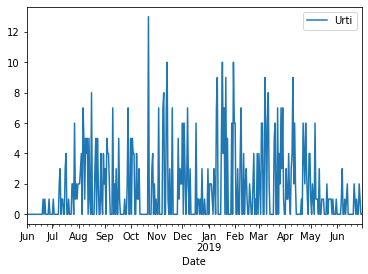

In [66]:
df.plot()

In [67]:
df_urti_weeklyS = df.resample('W').sum()
df_urti_weeklyM = df.resample('W').mean()

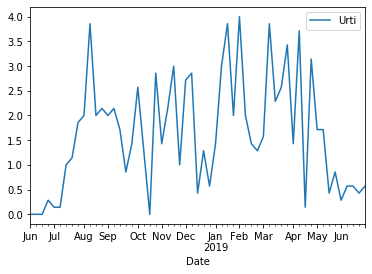

In [68]:
df_urti_weeklyM.plot()

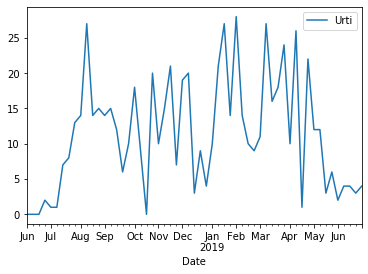

In [69]:
df_urti_weeklyS.plot()

In [70]:
df_diff=df.diff(1)

In [71]:
df_diff=df_diff[1:]

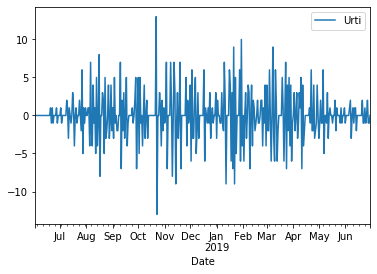

In [72]:
df_diff.plot()

# AR on weekly data with 1 time differencing

In [401]:
df_weekly=df_urti_weeklyM.diff(3)[3:]

In [402]:
df_weekly.head()

,Urti
Date,
2018-06-24,0.285714
2018-07-01,0.142857
2018-07-08,0.142857
2018-07-15,0.714286
2018-07-22,1.000000


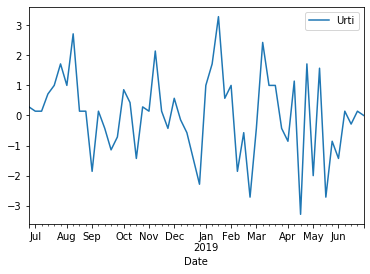

In [403]:
df_weekly.plot()

In [404]:
df_weekly.size

54

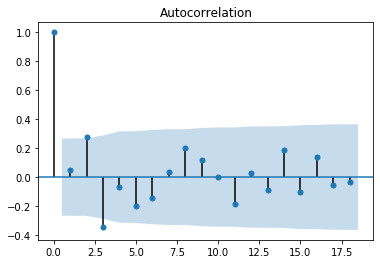

In [405]:
plot_acf(df_weekly);

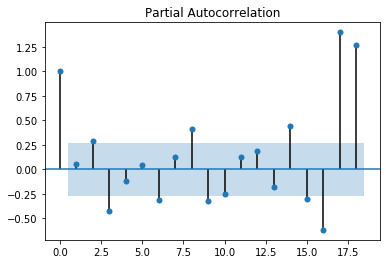

In [406]:
plot_pacf(df_weekly);

In [407]:
total=df_weekly
test_size=int(0.25*total.size)
train_size=total.size-test_size

In [408]:
test_size

13

In [409]:
train_size

41

In [410]:
total.size

54

In [411]:
train=total[:43]

In [412]:
test=total[43:]

In [413]:
train.size+test.size

54

In [414]:
from statsmodels.tsa.ar_model import AR

In [415]:
model=AR(total)
model_fit=model.fit()

In [416]:
preds=model_fit.predict(start=43,end=56)

In [417]:
preds.size

14

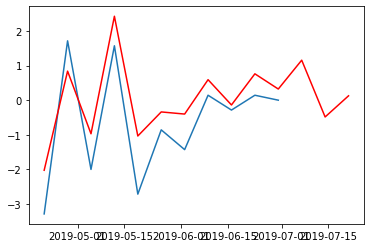

In [418]:
plt.plot(test)
plt.plot(preds,color='red')

In [419]:
model_fit.aic

0.5884295774279377

# ARIMA model

In [420]:
df_arima=df_urti_weeklyM

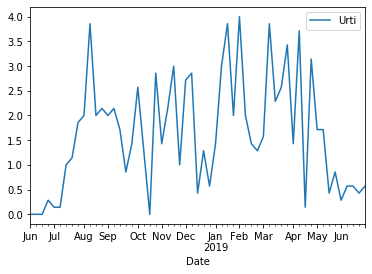

In [421]:
df_arima.plot()

In [422]:
total=df_arima
test_size=int(0.25*total.size)
train_size=total.size-test_size

In [423]:
test_size

14

In [424]:
train_size

43

In [425]:
total.size

57

In [426]:
train=total[:train_size]

In [427]:
test=total[train_size:]

In [428]:
train.size+test.size

57

In [429]:
from statsmodels.tsa.arima_model import ARIMA

In [450]:
model=ARIMA(train,order=(1,1,1))

In [451]:
fit_model=model.fit()

In [452]:
fit_model.aic

127.2735997677336

In [453]:
preds=fit_model.forecast(steps=test_size)[0]

In [454]:
preds.size

14

In [455]:
test.size

14

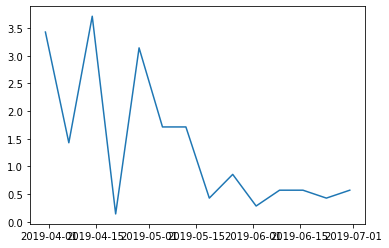

In [456]:
plt.plot(test)

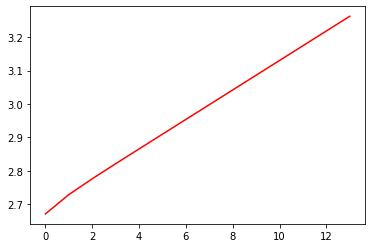

In [457]:
plt.plot(preds,color='red')

In [438]:
p=d=q=range(5)
import itertools

In [439]:
params=list(itertools.product(p,d,q))

In [442]:
len(params)

125

In [447]:
min_param=()
min_aic=300
import warnings as wngs
wngs.filterwarnings('ignore')
for par in params:
    try:
        model=ARIMA(train,order=(par[0],par[1],par[2]))
        model_fit=model.fit()
        aic=model_fit.aic
        if aic!=None and aic<min_aic:
            min_aic=aic
            min_param=par
    except:
        continue

In [448]:
min_param

(1, 1, 1)

In [449]:
min_aic

127.2735997677336